In [12]:
import tools
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import numpy as np
from scipy.optimize import curve_fit

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + 'cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
leg_font = font_manager.FontProperties(size=12)
font = {'color':'black','size':12}

ufile1 = "../data/file1k100us.csv"
file2 = "../data/filelow.csv"
ufile1_init = tools.files(ufile1)
file2_init = tools.files(file2)

flicker noise parameter  [5.90923491 1.34677368]
white noise parameter  [2.0644381e-05]


/tmp/ipykernel_30613/1857142648.py:24: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig,ax = plt.subplots()


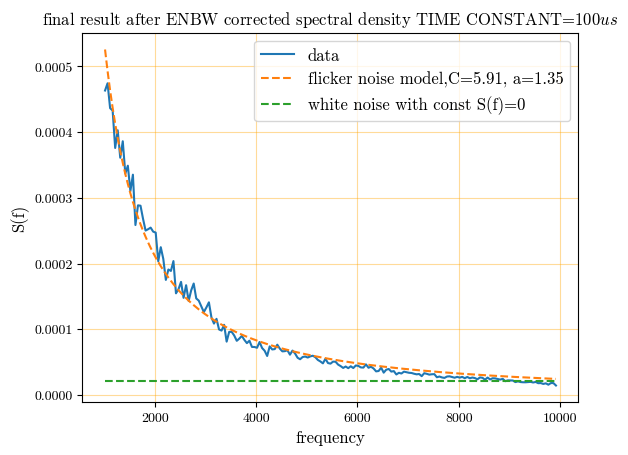

In [19]:
# data sorting as lower deviation
data0 = ufile1_init.sort_on_deviation(10)
data00,data01 = ufile1_init.point_mean(data0)

# ENBW corrected values of S(f)
data01 = data01/1250

# linearity guess
limit = 150 

# models for noise fitting
def flicker_noise(y,A,alpha):
    return A/(y**alpha)

def white(y,c):
    return 0.0*y+c

# Curve fitting
param, param_cov = curve_fit(flicker_noise, data00[:],data01[:])
param_white, param_cov_white = curve_fit(white,data00[limit:],data01[limit:])
print("flicker noise parameter ", param)
print("white noise parameter ",param_white)
# plots
fig,ax = plt.subplots()
ax.plot(data00[:],data01[:],label="data")
ax.plot(data00[:],flicker_noise(data00[:],param[0],param[1]),label=f"flicker noise model,C={round(param[0],2)}, a={round(param[1],2)}",linestyle="dashed")
ax.plot(data00[:],white(data00[:],param_white[0]),label=f"white noise with const S(f)={round(param_white[0])}",linestyle="dashed")
ax.set_xlabel("frequency",fontdict=font)
ax.set_ylabel("S(f)",fontdict=font)
ax.set_title("final result after ENBW corrected spectral density TIME CONSTANT=100$us$",fontdict=font)
ax.grid(which="both",axis="both",color="orange",alpha=0.4)
ax.legend(prop= leg_font)
plt.savefig("final_1000_100us.png",dpi=1000)


In [149]:
data = ufile1_init.get_mean()
data2,c =file2_init.shady_plot()
data2 = data2[0]
limit = 179

def flicker_noise(y,A,alpha):
    return A/(y**alpha)
def white(y,c):
    return 0.0*y+c

param, param_cov = curve_fit(flicker_noise, data[:,0],data[:,1])
param2, param_cov2 = curve_fit(flicker_noise, data2[:,0],data2[:,1])
param_white, param_cov_white = curve_fit(white,data[:,0],data[:,1])
param2
    # ax.plot(first,second)ax.plot(data[:,0],flicker_noise(data[:,0],param[0],param[1]))

array([ 0.05666868, -0.64836794])

/tmp/ipykernel_5761/700244595.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig,ax = plt.subplots()


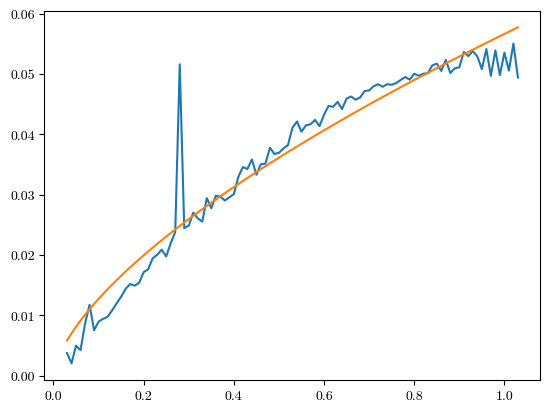

In [144]:
fig,ax = plt.subplots()

ax.plot(data2[:,0],data2[:,1])
ax.plot(data2[:,0],flicker_noise(data2[:,0],param2[0],param2[1]))
# ax.plot(data[:,0],white(data[:,0],param_white[0]))


## Time domain

/tmp/ipykernel_5761/3019482008.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig,ax= plt.subplots()


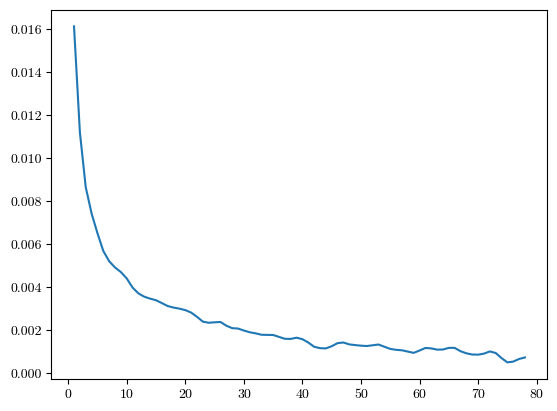

In [78]:
# time_dom = np.fft.ifft(data[:,1])
# fig,ax= plt.subplots()
# shifts = range(1,79,1)
# corr = []
# # print(data[:-5,1])
# for shift in shifts:
#     first = time_dom[shift:]
#     second = time_dom[:-shift]
#     corr.append(np.correlate(first, second))
    
# ax.plot(shifts,corr)


/tmp/ipykernel_5761/2820794479.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(data[:,1])


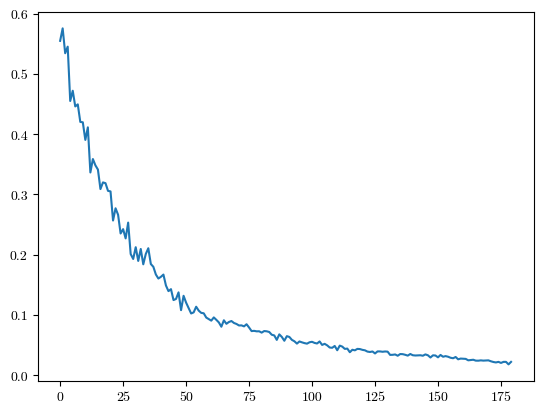

In [39]:
plt.plot(data[:,1])